In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
caracteristicas = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/características.CSV", 
                 sep=";", 
                 encoding='latin-1')

datosHogar = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/datosHogar.CSV", 
                 sep=";", 
                 encoding='latin-1')

migracion = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/migracion.CSV", 
                 sep=";", 
                 encoding='latin-1')

In [129]:
# rename column P4030S1A1 as 'estrato'

datosHogar.rename(columns={'P4030S1A1':'estrato'}, inplace=True)

In [130]:
# drop nan values in the column estrato
datosHogar = datosHogar.dropna(subset=['estrato'])

In [131]:
datosHogar['estrato'][datosHogar['estrato']==9] = 7

In [132]:
datosHogar['estrato'].value_counts()

1.0    9330
2.0    7553
3.0    4386
4.0    1589
5.0     517
0.0     361
6.0     272
7.0      78
Name: estrato, dtype: int64

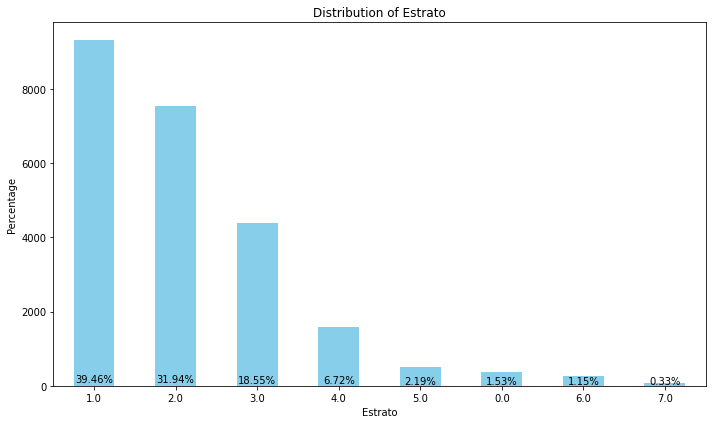

In [133]:
cont_estrato = datosHogar['estrato'].value_counts()

# Calculate the percentages
total = estrato_counts.sum()
percentages = (cont_estrato / total) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = cont_estrato.plot(kind='bar', color='skyblue')
plt.title('Distribution of Estrato')
plt.xlabel('Estrato')
plt.ylabel('Percentage')

# Add percentages on top of each bar
for index, value in enumerate(percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


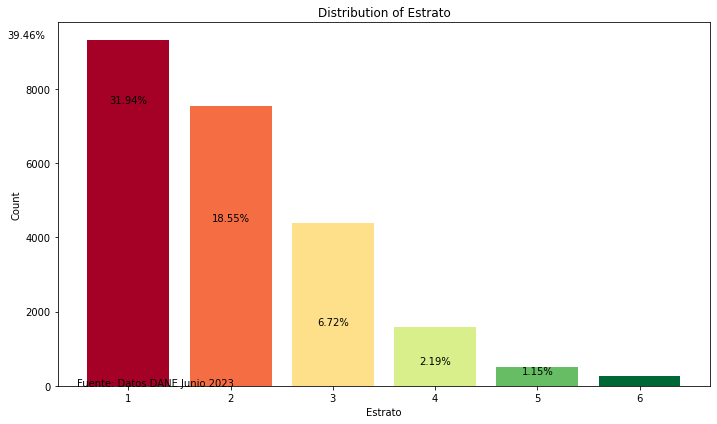

In [134]:
cont_estrato = cont_estrato.drop([0, 7])


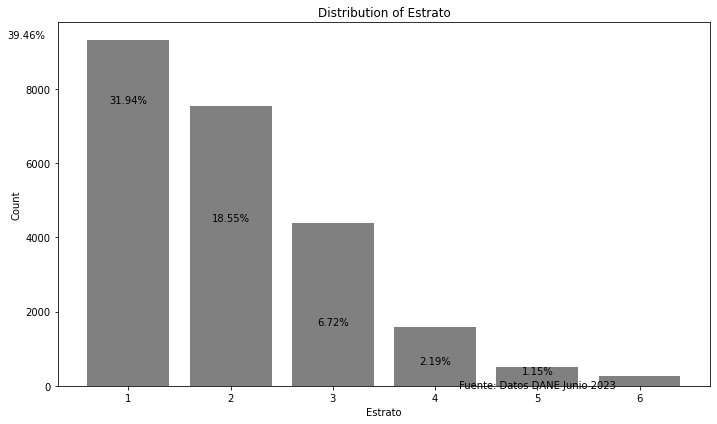

In [149]:
# colors = plt.cm.RdYlGr(np.linspace(0, 1, len(cont_estrato)))

plt.figure(figsize=(10, 6))
bars = plt.bar(cont_estrato.index.astype(int), cont_estrato, color='gray')
plt.title('Distribution of Estrato')
plt.xlabel('Estrato')
plt.ylabel('Count')

# Add percentages on top of each bar
percentages = (cont_estrato / cont_estrato.sum()) * 100
for index, value in enumerate(cont_estrato):
    plt.text(index, value, f'{percentages.iloc[index]:.2f}%', ha='center', va='bottom')

# Add a source label
plt.text(5, -60, 'Fuente: Datos DANE Junio 2023', fontsize=10, ha='center')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

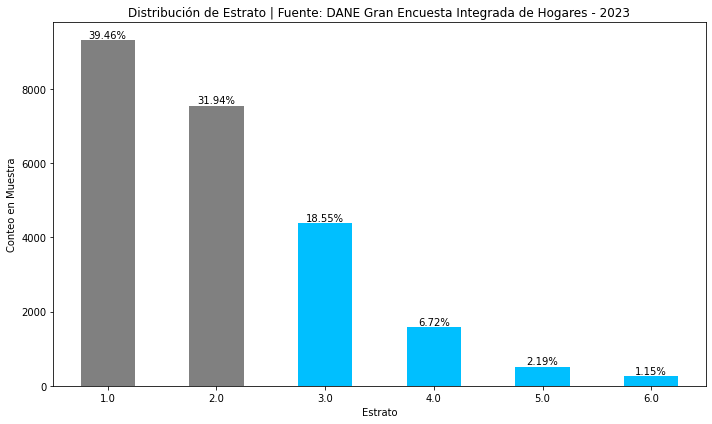

In [165]:
colors = ['gray', 'gray', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue' ]
plt.figure(figsize=(10, 6))
bars = cont_estrato.plot(kind='bar', color=colors)
plt.title('Distribución de Estrato | Fuente: DANE Gran Encuesta Integrada de Hogares - 2023')
# add text on the plot que diga Fuente: Datos DANE Junio 2023'

plt.xlabel('Estrato')
plt.ylabel('Conteo en Muestra')

percentages = (cont_estrato / cont_estrato.sum()) * 100
for index, value in enumerate(cont_estrato):
    plt.text(index, value, f'{percentages.iloc[index]:.2f}%', ha='center', va='bottom')


plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()